In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import polars as pl
import gc

# Data Reading


In [2]:
# Parquet 파일을 읽기
# polar를 활용하여 3번째 까지만 읽어옴

for i in range(0,4,1):
    df = pl.read_parquet(f'datasets/train.parquet/partition_id={i}')
    globals()[f'df_{i + 1}'] = df

In [3]:
df_tmp_total = pl.concat([df_1, df_2, df_3])
df_tmp_total.shape

(7785330, 92)

In [4]:
day_1 = df_tmp_total.filter(pl.col("date_id") == 1)
day_1

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
1,0,0,1.749479,null,null,null,null,null,0.053447,2.192887,1.160708,-0.00983,11,7,76,-0.819115,1.403962,-0.098782,null,0.340309,null,-1.577595,-1.237946,1.039095,null,0.756488,0.432157,-1.626238,-0.137137,null,null,0.952274,-0.186008,0.127051,null,null,…,2.20351,null,null,-0.850504,null,-1.543995,1.741718,null,2.035935,0.892778,-1.081097,null,null,null,null,null,-0.734145,0.276101,-0.576441,-0.799783,4.812901,0.393107,null,null,-0.226359,-0.327119,-0.31504,-0.385573,-0.022355,0.337951,0.156607,1.406054,3.6808,0.598633,2.337418,2.577889,0.725604
1,0,1,3.911768,null,null,null,null,null,0.053053,2.126396,1.101112,-0.013003,11,7,76,-0.839616,2.043382,-0.109693,null,0.063372,null,-1.372385,-0.35307,0.751294,null,2.282396,1.263641,-1.622081,-0.294155,null,null,1.758774,-0.304175,0.141651,null,null,…,0.673048,null,null,-0.765633,null,-1.702322,1.68906,null,0.753961,0.197442,-1.081097,-0.022838,-0.400573,0.173137,null,null,-0.822781,1.984625,-0.017244,-1.149028,1.284678,-0.176955,null,null,-0.280429,-0.242559,-0.31284,-0.281565,0.16938,0.043324,-0.030532,0.985784,1.485551,-0.379609,1.677068,1.752096,-0.523871
1,0,2,1.062098,null,null,null,null,null,0.049771,1.897569,0.936499,-0.012585,81,2,59,-0.688746,1.482645,-0.340683,null,0.370178,null,-1.30026,-1.844302,-0.830805,null,-0.238425,0.028479,-1.182548,0.392532,null,null,0.341612,-0.521844,-0.178283,null,null,…,3.159928,null,null,-0.592981,null,-0.646195,1.875373,null,4.203779,1.5127,-1.081097,-0.362663,-0.576967,-0.583051,null,null,-0.807695,0.851287,-0.271779,-1.111671,1.145801,-0.261378,null,null,0.366157,0.405923,-0.148441,-0.146584,-0.484949,2.462649,-0.544341,-0.199138,1.638287,-0.311347,0.217322,-1.571629,0.598442
1,0,7,1.083765,null,null,null,null,null,0.034801,1.365109,0.866335,-0.009643,11,7,76,-1.025133,0.925701,-0.523978,null,0.21753,null,-2.165407,-1.268907,2.111038,null,0.484647,1.033527,-0.771244,0.504023,null,null,0.240051,0.634331,1.433624,null,null,…,2.450088,null,null,-0.909762,null,-0.857625,1.501932,null,0.078696,-0.019289,-1.081097,-0.571457,-0.229733,-0.426658,null,null,-0.865701,-0.507224,-0.487616,-0.91007,1.927954,-0.131662,null,null,-0.315205,-0.304216,-0.353955,-0.318037,-1.926957,-1.510374,-0.155575,-0.327899,-0.127712,-0.237061,1.023567,1.464319,-0.335524
1,0,9,2.015567,null,null,null,null,null,0.052724,1.93197,0.964913,-0.015632,11,7,76,-1.534853,-0.174624,-0.603317,null,-0.212626,null,-1.962477,-0.819575,0.850963,null,1.199708,0.503995,-0.922459,0.257535,null,null,0.014172,-0.445241,-0.089754,null,null,…,0.93571,null,null,-1.27724,null,-1.218835,1.369809,null,0.264098,0.186981,-1.081097,-0.500489,-0.450951,-0.537666,null,null,-1.314306,-0.030444,-0.700091,-1.139296,-0.130347,-0.743521,null,null,-0.247459,-0.21729,-0.28127,-0.276687,0.416857,-0.67107,-0.813518,0.921864,1.101624,-1.50329,0.962854,1.608399,-1.01472
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

In [5]:
day_0 = df_tmp_total.filter(pl.col("date_id") == 0)
day_0

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,null,…,0.204797,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,null,…,1.172836,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639
0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,null,…,0.535897,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,null,…,2.413415,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,null,null,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
0,0,14,0.44057,null,null,null,null,null,0.9552,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,null,0.646086,null,-1.844685,-1.58656,-0.182024,null,-0.969949,-0.673813,-1.282132,-1.399894,null,null,0.043815,-0.320225,-0.031713,null,null,…,1.253902,null,null,0.476195,null,-0.771732,2.843421,null,1.379815,0.411827,-1.36224,null,null,null,null,null,-0.948601,-0.136814,-0.447704,-1.141761,0.099631,-0.661928,null,null,3.678076,2.793581,2.61825,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

In [6]:
df_tmp_total.filter(pl.col("date_id") == 0)[:,1].value_counts().sort(by = 'time_id')

time_id,count
i16,u32
0,8
1,8
2,8
3,8
4,8
…,…
844,8
845,8
846,8


In [7]:
symbols_per_day = df_tmp_total.group_by("date_id").agg([pl.col("symbol_id").n_unique().alias("nb_symbols")])
symbols_per_day = symbols_per_day.sort('date_id')

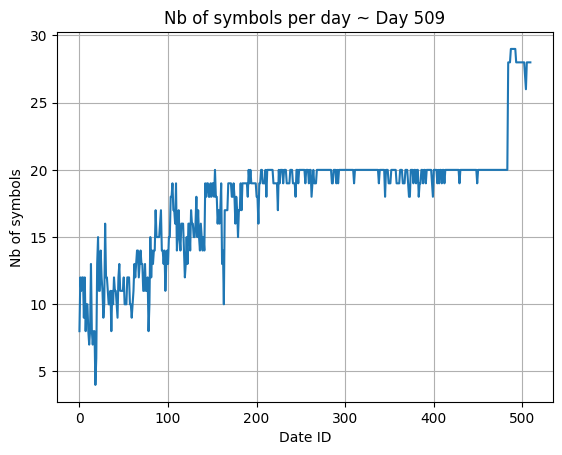

In [8]:
x = symbols_per_day["date_id"].to_numpy()
y = symbols_per_day["nb_symbols"].to_numpy()

plt.plot(x, y)
plt.xlabel("Date ID")
plt.ylabel("Nb of symbols")
plt.title("Nb of symbols per day ~ Day 509")
plt.grid()
plt.show()

# Visualization for Responses

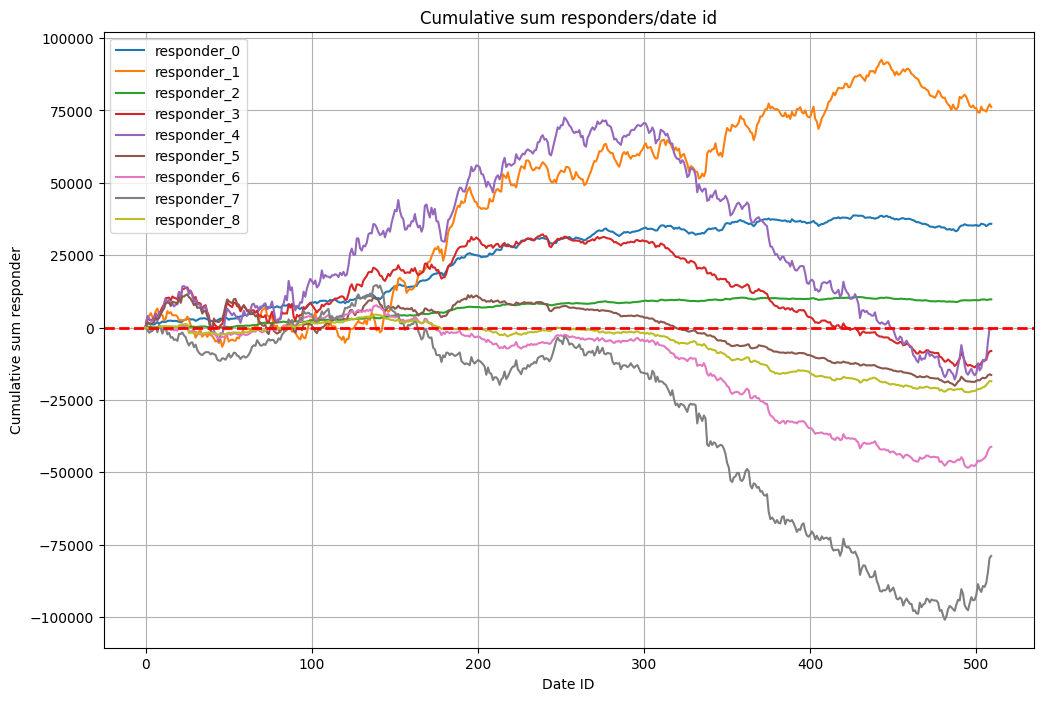

In [9]:
plt.figure(figsize=(12, 8))
for i in range(0,9):
    resp = df_tmp_total.group_by("date_id").agg(pl.col(f"responder_{i}").sum().alias("responder_sum"))
    resp = resp.sort('date_id')
    
    x = resp["date_id"].to_numpy()
    y = np.cumsum(resp['responder_sum'].to_numpy())

    plt.plot(x, y, label=f'responder_{i}')

plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Date ID")
plt.ylabel("Cumulative sum responder")
plt.title("Cumulative sum responders/date id")  
plt.grid()
plt.legend()
plt.show()

In [20]:
# responder들 가져요기
df_tmp_resp = df_tmp_total[:,83:92]

# 첫 번째 행의 date_id 가져오기
date_id_value = df_tmp_total["date_id"]  # 첫 번째 행의 date_id 값 가져오기

# date_id 값을 새로운 열로 추가
df_tmp_resp = df_tmp_resp.with_columns(
    pl.lit(date_id_value).alias("date_id")  # date_id 열 추가
)

df_tmp_resp.head(3)

responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,date_id
f32,f32,f32,f32,f32,f32,f32,f32,f32,i16
0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504,0
2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639,0
-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828,0


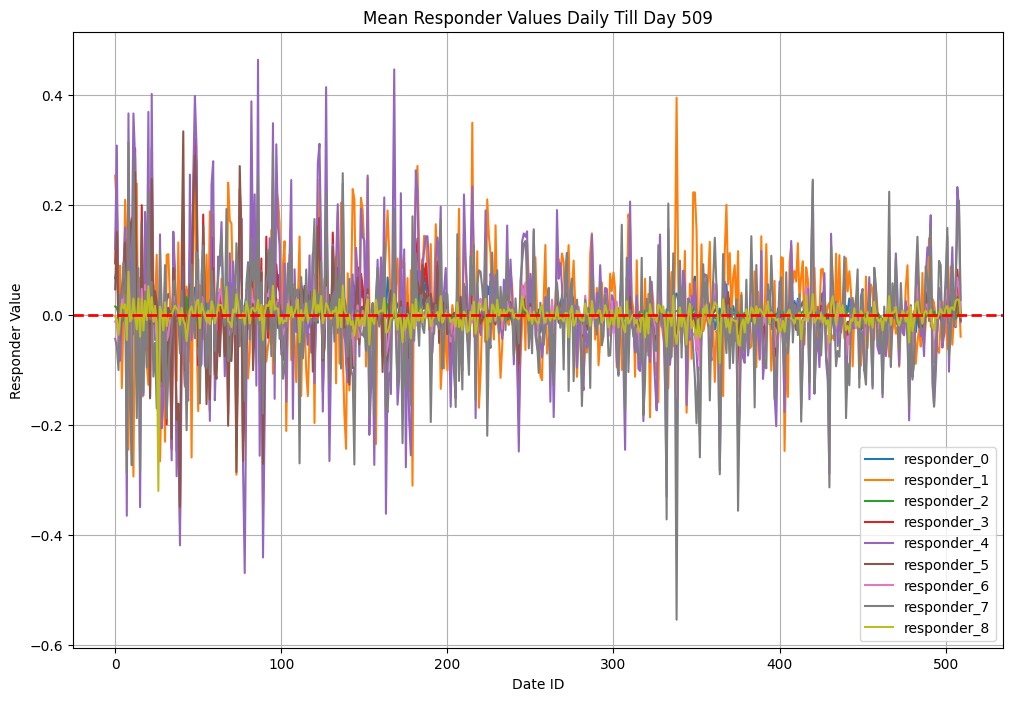

In [29]:
plt.figure(figsize=(12, 8))

# 일별로 responder의 평균 구하기
resp = df_tmp_total.group_by('date_id').agg([pl.col(f"responder_{i}").mean().alias(f"mean_responder_{i}") for i in range(9)]).sort('date_id')

for i in range(0,9):
    
    x = resp["date_id"].to_numpy()
    y = resp[f"mean_responder_{i}"].to_numpy()

    plt.plot(x, y, label=f'responder_{i}')

plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Date ID")
plt.ylabel("Responder Value")
plt.title("Mean Responder Values Daily Till Day 509")  
plt.grid()
plt.legend()
plt.show()

# 계층적 군집화
- 결측치 처리가 문제다.

In [34]:
# build datareading model
def read_data(num_f, num_s = 0):
    dfs = []
    for i in range(num_s,num_f):
        df = pl.read_parquet(f'datasets/train.parquet/partition_id={i}')
        dfs.append(df)

    df_total = pl.concat(dfs)
    return df_total

In [91]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

def plot_dendrogram(data):
    """
    Polars 데이터 프레임의 feature들 간 유클리드 거리 기반으로 덴드로그램을 그리는 함수.

    Parameters:
    - data: polars DataFrame, 덴드로그램을 그릴 데이터 (date_id 열을 포함해야 함)
    """
    # feature 데이터만 선택 (date_id 제외)
    features = data.drop("date_id")

    # 데이터를 numpy 배열로 변환
    feature_names = features.columns
    feature_array = features.to_numpy()

    # 계층적 군집화 수행
    linked = linkage(feature_array.transpose(), method='ward')  # 행이 아닌 열 기준으로 군집화

    # 덴드로그램 그리기
    plt.figure(figsize=(12, 8))
    dendrogram(
        linked,
        orientation='top',
        labels=feature_names,  # feature 이름을 레이블로 사용
        distance_sort='descending',
        show_leaf_counts=False
    )
    plt.title('Dendrogram (Columns)')
    plt.xticks(rotation = 45)
    plt.xlabel('Columns')
    plt.ylabel('Distance')
    plt.show()

# 클러스터링 모집
# 군집 갯수를 조정하기 쉽게 함수화
def perform_hierarchical_clustering(data, n_clusters=5): 
    # 계층적 군집화 수행

    data_np = data.to_numpy()
       
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = hierarchical.fit_predict(data_np)
    
    # 덴드로그램 시각화
    plt.figure(figsize=(10, 7))
    linkage_matrix = linkage(data, method='ward', metric='euclidean')
    dendrogram(linkage_matrix)
    plt.title('계층적 군집화 덴드로그램')
    plt.xlabel('샘플 인덱스')
    plt.ylabel('거리')
    plt.show()

    return clusters

def date_and_resp(df_tmp_total):
    # responder들 가져요기
    df_tmp_resp = df_tmp_total[:,83:92]

    # 첫 번째 행의 date_id 가져오기
    date_id_value = df_tmp_total["date_id"]

    # date_id 값을 새로운 열로 추가
    df_tmp_resp = df_tmp_resp.with_columns(
        pl.lit(date_id_value).alias("date_id")  # date_id 열 추가
    )

    return df_tmp_resp

def date_and_feature(df_tmp_total):
    # responder들 가져요기
    df_tmp_feat = df_tmp_total[:,4:83]

    # 첫 번째 행의 date_id 가져오기
    date_id_value = df_tmp_total["date_id"]  

    # date_id 값을 새로운 열로 추가
    df_tmp_feat = df_tmp_feat.with_columns(
        pl.lit(date_id_value).alias("date_id")  # date_id 열 추가
    )

    return df_tmp_feat

def sample_df_small(df):
    df_sampled = df.sample(n=50000, with_replacement=False)
    return df_sampled

In [36]:
# define early_model and late_model

df_early_model = read_data(2)
#df_mid_model = read_data(6, num_s = 4)
#df_late_model = read_data(10, num_s = 8)

In [92]:
# make date and resp datasets

df_early = sample_df_small(date_and_resp(df_early_model))
#df_mid = date_and_resp(df_mid_model)
#df_late = date_and_resp(df_late_model)

# Dendrogram by Responders

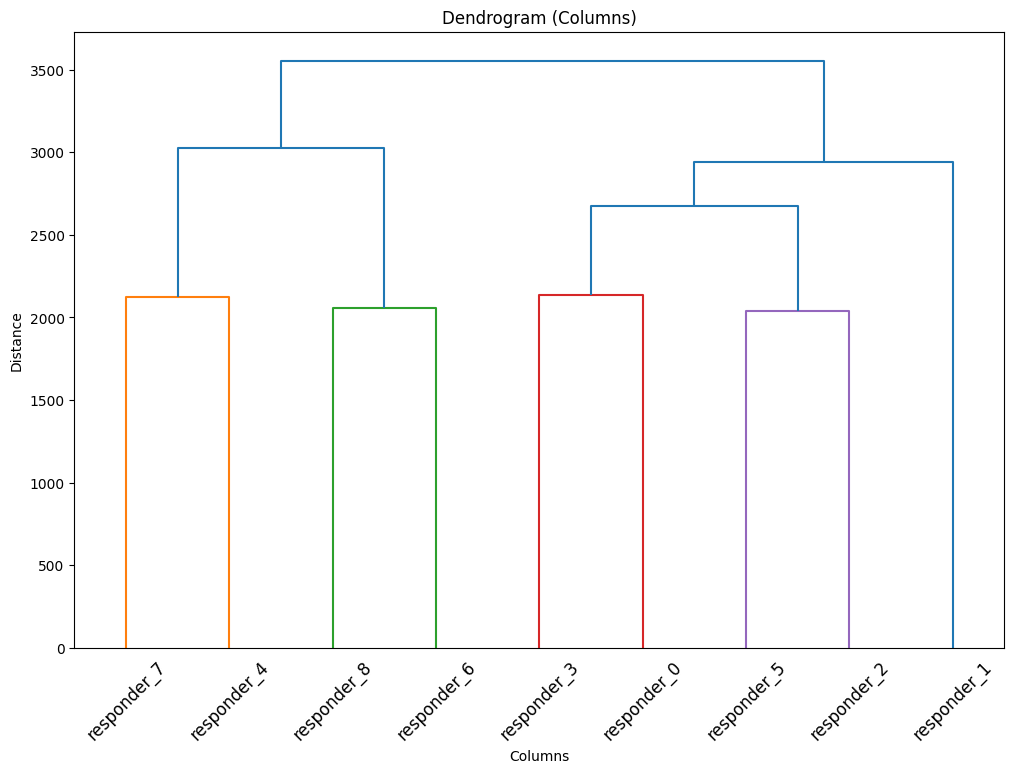

In [95]:
plot_dendrogram(date_and_resp(df_early_model))

In [96]:
date_and_resp(df_early_model)

responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,date_id
f32,f32,f32,f32,f32,f32,f32,f32,f32,i16
0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504,0
2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639,0
-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828,0
0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516,0
-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0,0
…,…,…,…,…,…,…,…,…,…
0.163901,0.134067,1.124346,0.484879,0.255225,0.479602,0.00854,0.027126,0.000452,339
0.637513,-0.01148,1.779785,0.757132,0.274228,0.741818,1.014812,0.573904,2.35997,339
-3.343947,-1.012429,-2.968987,-1.112956,-0.598563,-1.537665,-0.25963,-0.105986,-0.480081,339


## Dendrogram by Feature

In [90]:
# feature에는 결측치가 존재한다는 게 문제다.

df_early = sample_df_small(date_and_feature(df_early_model))
plot_dendrogram(df_early)

ValueError: The condensed distance matrix must contain only finite values.